<a href="https://colab.research.google.com/github/Gabriel-Souza-Silva-01/Classificacao_documento_juridico/blob/main/TG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Pandas e Base de dados

In [ ]:
import pandas as pd

url_dados = ("Base_de_dados.xlsx")

dados_civil_criminal = pd.read_excel (url_dados)

dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO
0,1,AÇÃO DE COBRANÇA. LEGITIMIDADE DE PARTES. JUIZ...,1
1,2,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1
2,3,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. AÇÃ...,1
3,4,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1
4,5,EMENTA: APELAÇÃO CÍVEL - AÇÃO INDENIZATÓRIA - ...,1


# Separando os arquivos entre teste e treino com o Sklearn

In [ ]:
from sklearn.model_selection import train_test_split

treino,teste,classe_treino, classe_teste = train_test_split (dados_civil_criminal.EMENTA,
                                                          dados_civil_criminal.TIPO,
                                                          random_state = 42)

In [ ]:
classe_teste

215    0
66     1
9      1
200    0
15     1
197    0
25     1
193    0
154    0
126    0
212    0
19     1
96     1
177    0
221    0
137    0
146    0
30     1
223    0
184    0
108    1
162    0
216    0
180    0
125    0
18     1
147    0
101    1
104    1
84     1
195    0
60     1
118    0
45     1
16     1
127    0
159    0
119    0
82     1
144    0
93     1
168    0
143    0
73     1
113    1
112    1
150    0
55     1
165    0
69     1
167    0
109    1
124    0
79     1
86     1
95     1
211    0
Name: TIPO, dtype: int64

In [ ]:
classe_treino

117    0
38     1
24     1
67     1
185    0
      ..
106    1
14     1
92     1
179    0
102    1
Name: TIPO, Length: 171, dtype: int64

In [ ]:
print ("Criminal \n")
print (dados_civil_criminal.EMENTA [117])

Criminal 

RECURSO EM HABEAS CORPUS. ESTUPRO DE VULNERÁVEL EM CONTINUIDADE DELITIVA. RETRATAÇÃO QUANTO AO NÚMERO DE AÇÕES DELITUOSAS. JUSTIFICAÇÃO CRIMINAL INDEFERIDA. ESCOPO DE REABERTURA DA INSTRUÇÃO CRIMINAL PARA REINQUIRIÇÃO DA VÍTIMA E DE TESTEMUNHA. INVIABILIDADE. INEXISTÊNCIA DE PROVAS NOVAS. RECURSO IMPROVIDO. 1. Como cediço, quando se trata de revisão criminal, para que novas informações sobre o fato, quando provenientes de testemunhas, possam ser consideradas elementos de prova, os depoimentos devem ser prestados sob o manto do contraditório e da ampla defesa, por meio da justificação criminal (AgRg no RHC n. 112.310/SP, Rel. Ministro REYNALDO SOARES DA FONSECA, QUINTA TURMA, julgado em 13/08/2019, DJe 30/08/2019). 2. Contudo, a hipótese enquadra-se entre aquelas em que o que se pretende é a reabertura da instrução criminal, inviável em sede de justificação e que não se coaduna com o instituto da revisão criminal, mormente quando a prova que se quer produzir não se caracteriz

In [ ]:
print (dados_civil_criminal.TIPO.value_counts())

1    114
0    114
Name: TIPO, dtype: int64


In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO
0,1,AÇÃO DE COBRANÇA. LEGITIMIDADE DE PARTES. JUIZ...,1
1,2,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1
2,3,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. AÇÃ...,1
3,4,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1
4,5,EMENTA: APELAÇÃO CÍVEL - AÇÃO INDENIZATÓRIA - ...,1


# Criando coluna "CLASSIFICACAO", para atribuir valor (1 = Cível, 0 = Criminal)

In [ ]:
CLASSIFICACAO = dados_civil_criminal ["TIPO"] .replace ([1,0], ["Civel", "Criminal"])

In [ ]:
dados_civil_criminal ["CLASSIFICACAO"] = CLASSIFICACAO

In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO
0,1,AÇÃO DE COBRANÇA. LEGITIMIDADE DE PARTES. JUIZ...,1,Civel
1,2,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1,Civel
2,3,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. AÇÃ...,1,Civel
3,4,RESPONSABILIDADE CIVIL – DISCUSSÃO SOBRE A EXI...,1,Civel
4,5,EMENTA: APELAÇÃO CÍVEL - AÇÃO INDENIZATÓRIA - ...,1,Civel


# Importando CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Ação de indenização por danos morais", "O réu foi condenado"]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform (texto)

In [ ]:
vetorizar.get_feature_names_out()

array(['ação', 'condenado', 'danos', 'de', 'foi', 'indenização', 'morais',
       'por', 'réu'], dtype=object)

In [ ]:
bag_of_words

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

# Matriz Esparsa

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                  columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

,ação,condenado,danos,de,foi,indenização,morais,por,réu
0,1,0,1,1,0,1,1,1,0
1,0,1,0,0,1,0,0,0,1


# Vetorizando toda a coluna "Ementa" do DataFrame

In [ ]:
vetorizar = CountVectorizer(max_features=50)
bag_of_words = vetorizar.fit_transform(dados_civil_criminal.EMENTA)
print(bag_of_words.shape)

(228, 50)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def classificar_texto(texto, coluna_EMENTA, coluna_CLASSIFICACAO):
  vetorizar = CountVectorizer(max_features=10)
  bag_of_words = vetorizar.fit_transform(dados_civil_criminal.EMENTA)
  treino,teste,classe_treino, classe_teste = train_test_split (bag_of_words,
                                                            texto [coluna_CLASSIFICACAO],
                                                            random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)
print(classificar_texto (dados_civil_criminal, "EMENTA", "CLASSIFICACAO"))

0.9649122807017544


# Instalando biblioteca WordCloud

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ''.join([texto for texto in dados_civil_criminal.EMENTA])

nuvem_palavras = WordCloud(width= 800, height = 500,
                           max_font_size = 110,
                           collocations = False).generate (todas_palavras)

# Objeto retornado pela WordCloud

In [ ]:
nuvem_palavras

# Importando Matplotlib

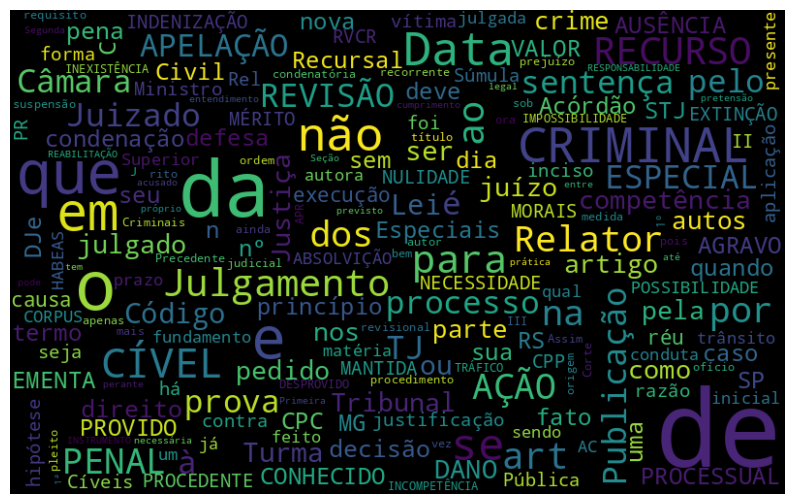

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow (nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
dados_civil_criminal.query("CLASSIFICACAO == 'Criminal'")

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO
114,115,REVISÃO CRIMINAL. PENAL E PROCESSUAL PENAL. AR...,0,Criminal
115,116,AGRAVO INTERNO – LIMINAR EM REVISÃO CRIMINAL –...,0,Criminal
116,117,PROCESSUAL PENAL. AGRAVO REGIMENTAL. REVISÃO C...,0,Criminal
117,118,RECURSO EM HABEAS CORPUS. ESTUPRO DE VULNERÁVE...,0,Criminal
118,119,PENAL. PROCESSO PENAL. REEXAME NECESSÁRIO EM P...,0,Criminal
...,...,...,...,...
223,224,HABEAS CORPUS. PENAL. PROCESSUAL PENAL. FURTO ...,0,Criminal
224,225,EMENTA: APELAÇÃO CRIMINAL. CRIME AMBIENTAL. AR...,0,Criminal
225,226,APELAÇÃO CRIMINAL. VIOLÊNCIA DOMÉSTICA E FAMIL...,0,Criminal
226,227,APELAÇÃO CRIMINAL - VEÍCULO APREENDIDO EM INQU...,0,Criminal


# Função para nuvem de palavras Cível

In [ ]:
def nuvem_palavras_civel(texto,coluna_texto):
  texto_civel = texto.query("CLASSIFICACAO == 'Civel'")
  todas_palavras = ''.join([texto for texto in texto_civel[coluna_texto]])

  nuvem_palavras = WordCloud(width= 800, height = 500,
                            max_font_size = 110,
                            collocations = False).generate (todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow (nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#  Função para nuvem de palavras Criminal

In [ ]:
def nuvem_palavras_criminal(texto,coluna_texto):
  texto_criminal = texto.query("CLASSIFICACAO == 'Criminal'")
  todas_palavras = ''.join([texto for texto in texto_criminal[coluna_texto]])

  nuvem_palavras = WordCloud(width= 800, height = 500,
                            max_font_size = 110,
                            collocations = False).generate (todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow (nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

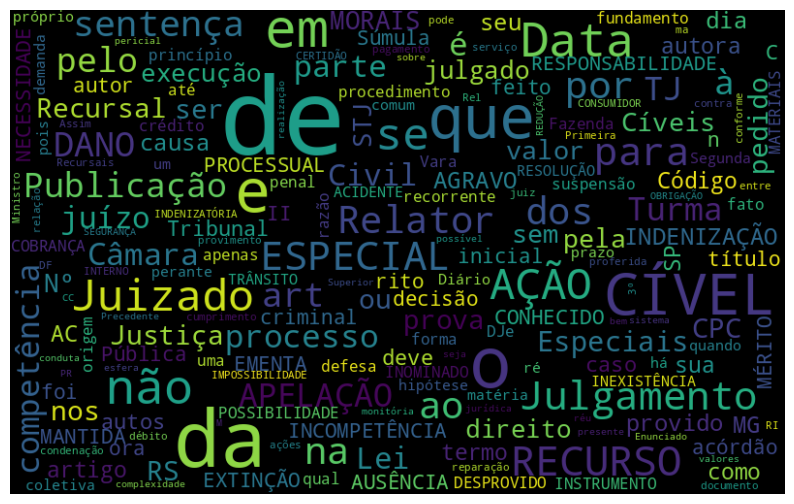

In [ ]:
nuvem_palavras_civel(dados_civil_criminal,"EMENTA")

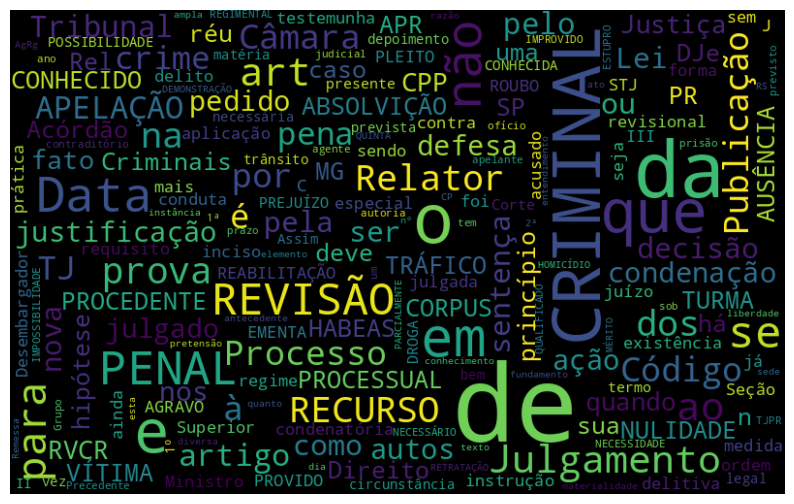

In [ ]:
nuvem_palavras_criminal(dados_civil_criminal,"EMENTA")

# Importando a biblioteca NLTK

In [ ]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import nltk
frase= ["Ementa cível", "Ementa criminal"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Ementa cível': 1, 'Ementa criminal': 1})

# Tokenalização

In [ ]:
from nltk import tokenize

frase= "PROCESSUAL PENAL AGRAVO REGIMENTAL"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print (token_frase)


['PROCESSUAL', 'PENAL', 'AGRAVO', 'REGIMENTAL']


# Tokenalização de todo o DataFrame

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [ ]:
df_frequencia = pd.DataFrame ({"Palavra": list(frequencia.keys()),
                              "Frequencia":list(frequencia.values())})


In [ ]:
df_frequencia.nlargest (columns = "Frequencia", n = 10)

,Palavra,Frequencia
29,de,2129
27,a,1106
55,do,1027
64,-,955
35,da,888
1,DE,756
154,o,748
40,que,616
174,e,469
249,em,453


# Importando biblioteca SEABORN para criação do GRÁFICO DE PARETO

In [ ]:
import seaborn as sns

# Função pareto

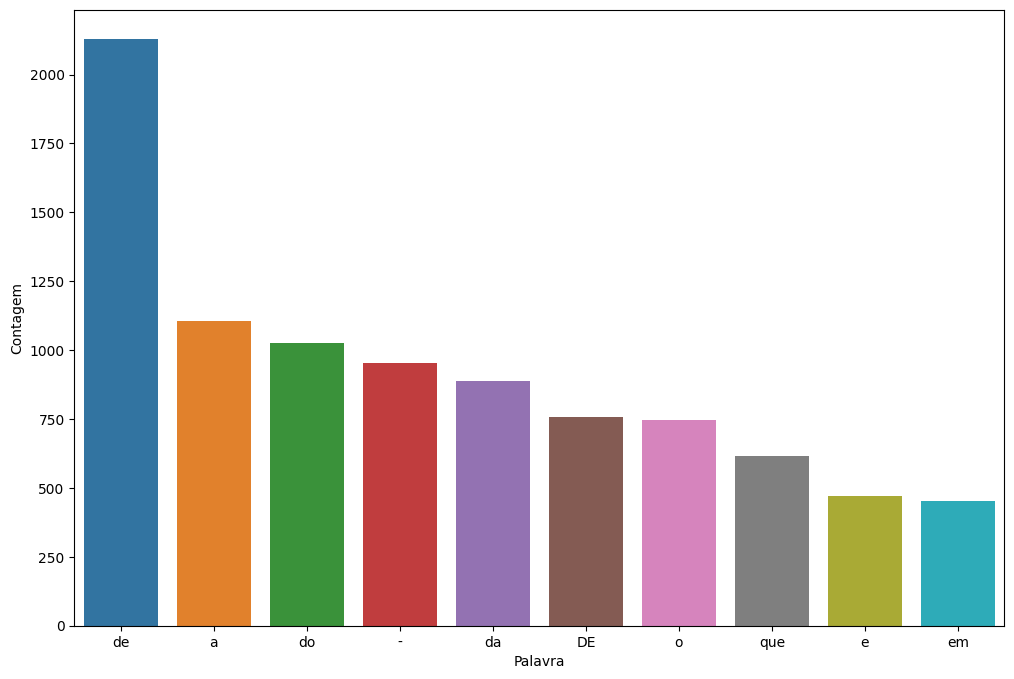

In [ ]:
def pareto (texto,coluna_texto,quantidade):
  todas_palavras = ''.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame ({"Palavra": list(frequencia.keys()),
                              "Frequencia":list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest (columns = "Frequencia", n = quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot (data = df_frequencia, x = "Palavra", y = "Frequencia")
  ax.set (ylabel = "Contagem")
  plt.show()

pareto(dados_civil_criminal, "EMENTA",10)

# Lower na coluna EMENTA

In [ ]:
dados_civil_criminal['EMENTA'] = dados_civil_criminal['EMENTA'].str.lower()
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO
0,1,ação de cobrança. legitimidade de partes. juiz...,1,Civel
1,2,responsabilidade civil – discussão sobre a exi...,1,Civel
2,3,recurso ordinário em mandado de segurança. açã...,1,Civel
3,4,responsabilidade civil – discussão sobre a exi...,1,Civel
4,5,ementa: apelação cível - ação indenizatória - ...,1,Civel


# Função para retirar StopWords e apresentar a nova forma na coluna "tratamento_1"

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for apontamento in dados_civil_criminal.EMENTA:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(apontamento)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados_civil_criminal ["TRATAMENTO_1"] = frase_processada

In [ ]:
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO,TRATAMENTO_1
0,1,ação de cobrança. legitimidade de partes. juiz...,1,Civel,ação cobrança. legitimidade partes. juizado es...
1,2,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...
2,3,recurso ordinário em mandado de segurança. açã...,1,Civel,recurso ordinário mandado segurança. ação rest...
3,4,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...
4,5,ementa: apelação cível - ação indenizatória - ...,1,Civel,ementa: apelação cível - ação indenizatória - ...


In [ ]:
classificar_texto(dados_civil_criminal, "TRATAMENTO_1", "CLASSIFICACAO")

0.9649122807017544

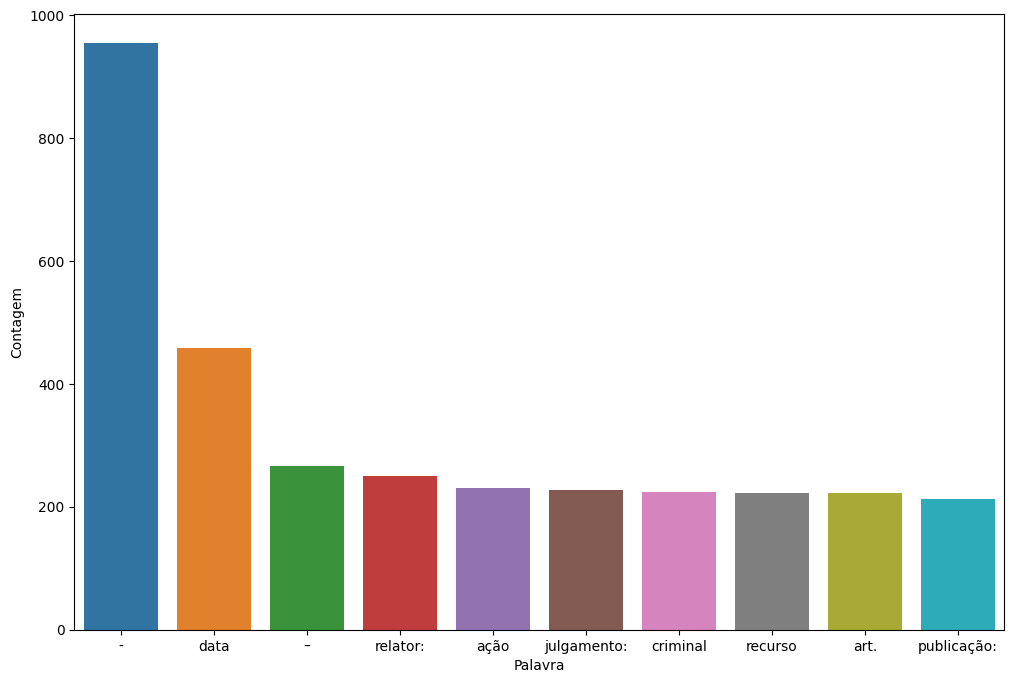

In [ ]:
pareto(dados_civil_criminal,"TRATAMENTO_1", 10)

## Retirando palavras sem valor semêntico: data, relator, julgamento, publicação, art

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes += ["julgamento", "data", "relator", "publicação", "art"]

frase_processada = []
for apontamento in dados_civil_criminal.EMENTA:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(apontamento)
    for palavra in palavras_texto:
        if palavra.lower() not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados_civil_criminal["TRATAMENTO_1"] = frase_processada

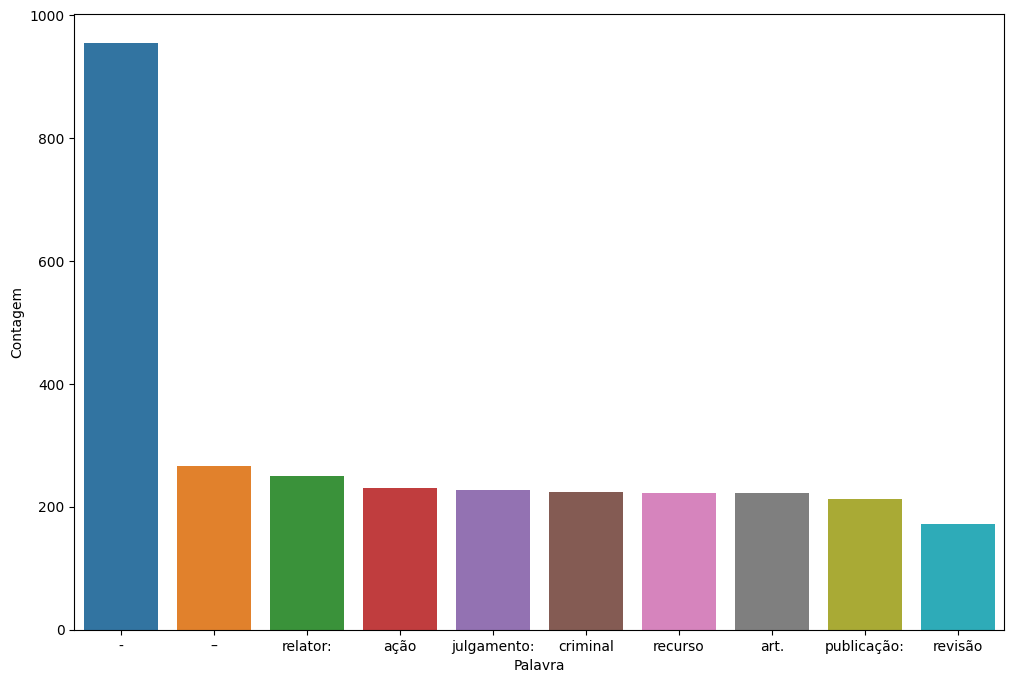

In [ ]:
pareto(dados_civil_criminal,"TRATAMENTO_1", 10)

# Retirando pontuação do DataSet

In [ ]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


In [ ]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for apontamento in dados_civil_criminal ["TRATAMENTO_1"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(apontamento)
  for palavra in palavras_texto:
    if palavra  not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados_civil_criminal ["TRATAMENTO_2"] = frase_processada

In [ ]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO,TRATAMENTO_1,TRATAMENTO_2
0,1,ação de cobrança. legitimidade de partes. juiz...,1,Civel,ação cobrança. legitimidade partes. juizado es...,ação cobrança legitimidade partes juizado espe...
1,2,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...
2,3,recurso ordinário em mandado de segurança. açã...,1,Civel,recurso ordinário mandado segurança. ação rest...,recurso ordinário mandado segurança ação resti...
3,4,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...
4,5,ementa: apelação cível - ação indenizatória - ...,1,Civel,ementa: apelação cível - ação indenizatória - ...,ementa apelação cível ação indenizatória veícu...


In [ ]:
dados_civil_criminal ["TRATAMENTO_1"] [0]

'ação cobrança. legitimidade partes. juizado especial cível. microempresa. legitimidade figurar polo ativo ação. inteligência artigo 8º, § 1º, ii, lei 9099/95 – comprovada condição microempresa empresa pequeno porte pessoa jurídica, nada impede ajuíze ação juizado especial cível, visto própria legislação autoriza. ação julgada extinta. recurso autor parcialmente provido. (tjsp- 1ª turma- ri 1003526-40.2018.8.26.0482 - presidente prudente – relª juíza flávia alves medeiros). (tj-sp - ri: 10035264020188260482 sp 1003526-40.2018.8.26.0482, relator: flávia alves medeiros, julgamento: 29/08/2018, 1ª turma, publicação: 29/08/2018)'

In [ ]:
dados_civil_criminal ["TRATAMENTO_2"] [0]

'ação cobrança legitimidade partes juizado especial cível microempresa legitimidade figurar polo ativo ação inteligência artigo 8º § 1º ii lei 9099 95 – comprovada condição microempresa empresa pequeno porte pessoa jurídica nada impede ajuíze ação juizado especial cível visto própria legislação autoriza ação julgada extinta recurso autor parcialmente provido tjsp 1ª turma ri 1003526 40 2018 8 26 0482 presidente prudente – relª juíza flávia alves medeiros ). tj sp ri 10035264020188260482 sp 1003526 40 2018 8 26 0482 flávia alves medeiros 29 08 2018 1ª turma 29 08 2018'

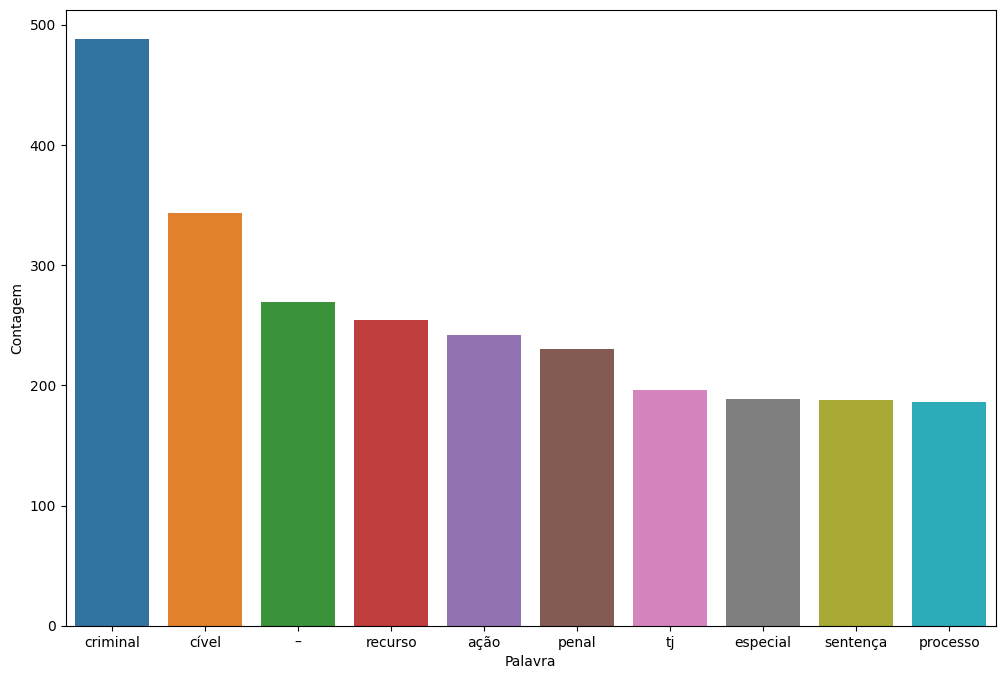

In [ ]:
pareto(dados_civil_criminal, "TRATAMENTO_2", 10)

# Retirando acento

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import unidecode

acentos = "Cível ação inteligência é tão"

teste = unidecode.unidecode(acentos)
print(teste)

Civel acao inteligencia e tao


In [ ]:
sem_acentos = [unidecode.unidecode (texto) for texto in dados_civil_criminal ["TRATAMENTO_2"]]

In [ ]:
sem_acentos[0]

'acao cobranca legitimidade partes juizado especial civel microempresa legitimidade figurar polo ativo acao inteligencia artigo 8o SS 1o ii lei 9099 95 - comprovada condicao microempresa empresa pequeno porte pessoa juridica nada impede ajuize acao juizado especial civel visto propria legislacao autoriza acao julgada extinta recurso autor parcialmente provido tjsp 1a turma ri 1003526 40 2018 8 26 0482 presidente prudente - rela juiza flavia alves medeiros ). tj sp ri 10035264020188260482 sp 1003526 40 2018 8 26 0482 flavia alves medeiros 29 08 2018 1a turma 29 08 2018'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [ ]:
dados_civil_criminal["TRATAMENTO_3"] = sem_acentos

frase_processada = list()
for apontamento in dados_civil_criminal ["TRATAMENTO_3"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(apontamento)
  for palavra in palavras_texto:
    if palavra  not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados_civil_criminal ["TRATAMENTO_3"] = frase_processada

In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO,TRATAMENTO_1,TRATAMENTO_2,TRATAMENTO_3
0,1,ação de cobrança. legitimidade de partes. juiz...,1,Civel,ação cobrança. legitimidade partes. juizado es...,ação cobrança legitimidade partes juizado espe...,acao cobranca legitimidade partes juizado espe...
1,2,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...,responsabilidade civil discussao sobre existen...
2,3,recurso ordinário em mandado de segurança. açã...,1,Civel,recurso ordinário mandado segurança. ação rest...,recurso ordinário mandado segurança ação resti...,recurso ordinario mandado seguranca acao resti...
3,4,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...,responsabilidade civil discussao sobre existen...
4,5,ementa: apelação cível - ação indenizatória - ...,1,Civel,ementa: apelação cível - ação indenizatória - ...,ementa apelação cível ação indenizatória veícu...,ementa apelacao civel acao indenizatoria veicu...


# Removendo a coluna "tratamento_3"

In [ ]:
acuracia_tratamento3 = classificar_texto(dados_civil_criminal, "TRATAMENTO_3", "CLASSIFICACAO" )
print(acuracia_tratamento3)

0.9649122807017544


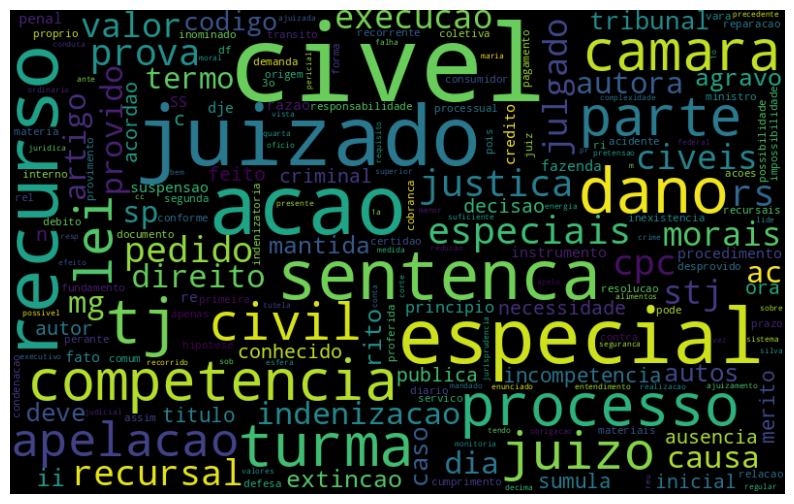

In [ ]:
nuvem_palavras_civel(dados_civil_criminal,"TRATAMENTO_3")

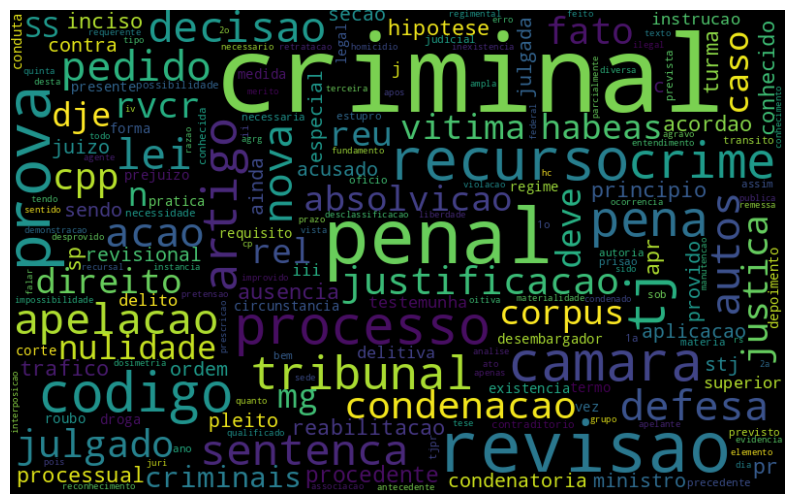

In [ ]:
nuvem_palavras_criminal(dados_civil_criminal,"TRATAMENTO_3")

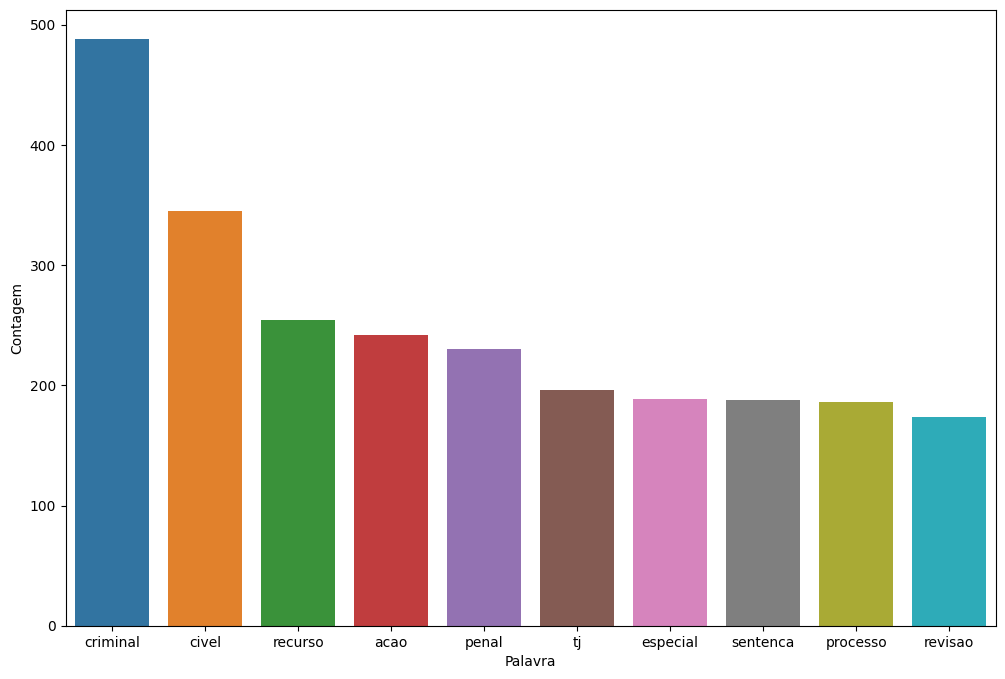

In [ ]:
pareto(dados_civil_criminal,"TRATAMENTO_3",10)

# Stemming (Reduzindo palavra ao seu radical)

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('inteligencia')

'inteligenc'

In [ ]:


frase_processada = list()
for apontamento in dados_civil_criminal ["TRATAMENTO_3"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(apontamento)
  for palavra in palavras_texto:
    if palavra  not in pontuacao_stopwords:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

dados_civil_criminal ["TRATAMENTO_4"] = frase_processada

In [ ]:
acuracia_tratamento4 = classificar_texto(dados_civil_criminal, "TRATAMENTO_4", "CLASSIFICACAO")
print (acuracia_tratamento4)
print (acuracia_tratamento3)

0.9649122807017544
0.9649122807017544


In [ ]:
dados_civil_criminal.head()

,PROCESSO,EMENTA,TIPO,CLASSIFICACAO,TRATAMENTO_1,TRATAMENTO_2,TRATAMENTO_3,TRATAMENTO_4
0,1,ação de cobrança. legitimidade de partes. juiz...,1,Civel,ação cobrança. legitimidade partes. juizado es...,ação cobrança legitimidade partes juizado espe...,acao cobranca legitimidade partes juizado espe...,aca cobranc legitim part juiz espec civel micr...
1,2,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...,responsabilidade civil discussao sobre existen...,respons civil discussa sobr existenc falh real...
2,3,recurso ordinário em mandado de segurança. açã...,1,Civel,recurso ordinário mandado segurança. ação rest...,recurso ordinário mandado segurança ação resti...,recurso ordinario mandado seguranca acao resti...,recurs ordinari mand seguranc aca restituica v...
3,4,responsabilidade civil – discussão sobre a exi...,1,Civel,responsabilidade civil – discussão sobre exist...,responsabilidade civil – discussão sobre exist...,responsabilidade civil discussao sobre existen...,respons civil discussa sobr existenc falh real...
4,5,ementa: apelação cível - ação indenizatória - ...,1,Civel,ementa: apelação cível - ação indenizatória - ...,ementa apelação cível ação indenizatória veícu...,ementa apelacao civel acao indenizatoria veicu...,ement apelaca civel aca indeniz veicul adulter...


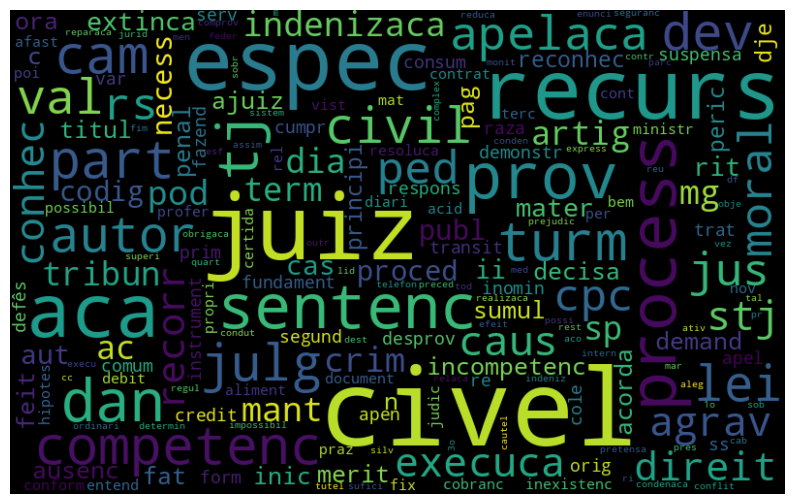

In [ ]:
nuvem_palavras_civel(dados_civil_criminal,"TRATAMENTO_4")

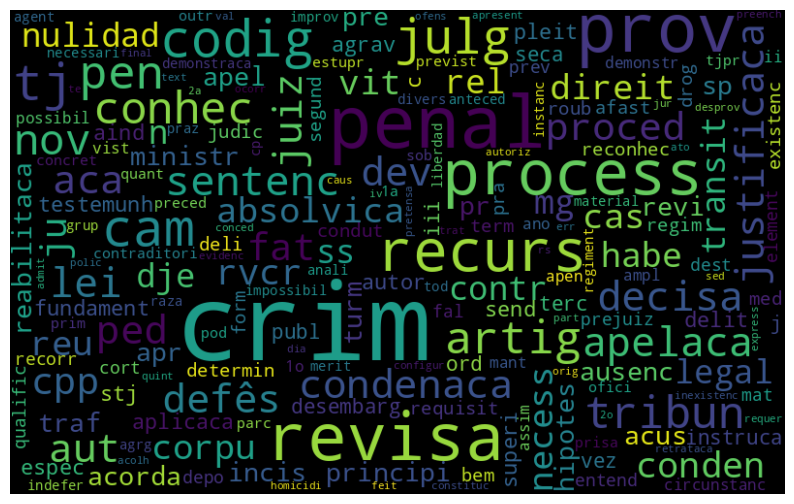

In [ ]:
nuvem_palavras_criminal(dados_civil_criminal,"TRATAMENTO_4")

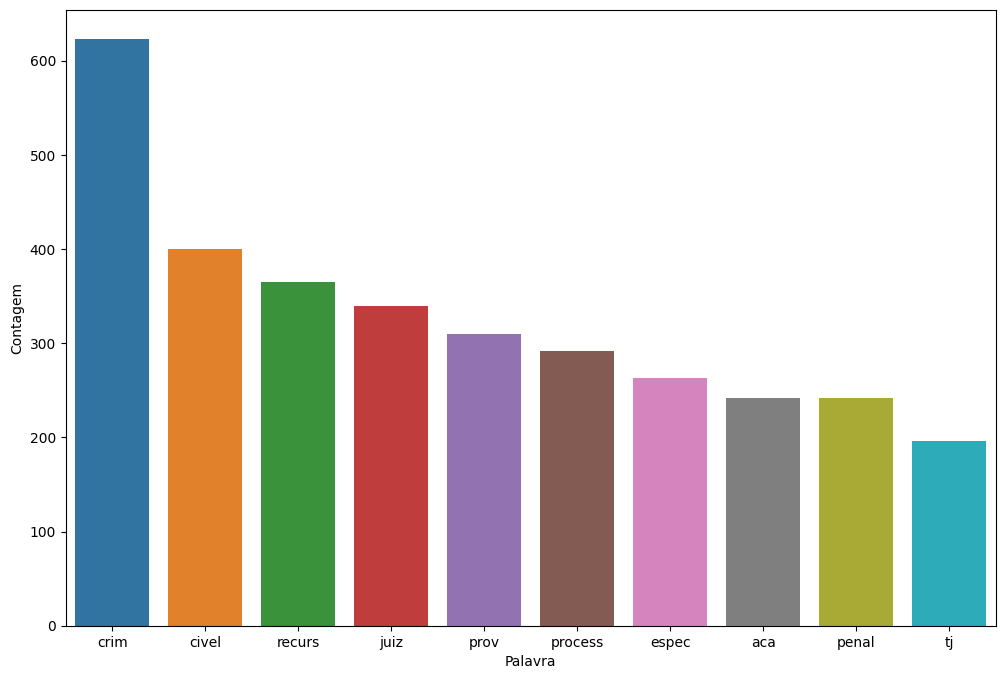

In [ ]:
pareto(dados_civil_criminal,"TRATAMENTO_4",10)

# TF-IDF Vetorização por peso

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Processado em ação por danos morais", "Processado em ação por tráfico de drogas"]

tfidf = TfidfVectorizer(lowercase = False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns = tfidf.get_feature_names_out()
)




,Processado,ação,danos,de,drogas,em,morais,por,tráfico
0,0.354649,0.354649,0.498446,0.000000,0.000000,0.354649,0.498446,0.354649,0.000000
1,0.317404,0.317404,0.000000,0.446101,0.446101,0.317404,0.000000,0.317404,0.446101


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressao_logistica = LogisticRegression()

In [ ]:
tfidf_bruto = tfidf.fit_transform (dados_civil_criminal ["EMENTA"])
treino,teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                             dados_civil_criminal["CLASSIFICACAO"],
                                                             random_state = 42)
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_bruto)

1.0


In [ ]:
tfidf_tratados = tfidf.fit_transform (dados_civil_criminal ["TRATAMENTO_4"])
treino,teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                             dados_civil_criminal["CLASSIFICACAO"],
                                                             random_state = 42)
regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_tratados)

1.0


# Ngram

In [ ]:
from nltk import ngrams

frase = "Ação de indenização por danos morais"
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list (pares)

[('Ação', 'de'),
 ('de', 'indenização'),
 ('indenização', 'por'),
 ('por', 'danos'),
 ('danos', 'morais')]

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados_civil_criminal["TRATAMENTO_4"])
treino,teste,classe_treino,classe_teste = train_test_split(vetor_tfidf,
                                                           dados_civil_criminal["CLASSIFICACAO"],
                                                           random_state=42)

regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf_ngrams)

1.0


In [ ]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(dados_civil_criminal["TRATAMENTO_4"])
treino,teste,classe_treino,classe_teste = train_test_split(vetor_tfidf,
                                                           dados_civil_criminal["CLASSIFICACAO"],
                                                           random_state=42)

regressao_logistica.fit(treino,classe_treino)
acuracia_tfidf = regressao_logistica.score(teste,classe_teste)
print(acuracia_tfidf)

1.0


# Criminal

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(10,0)

,0
crim,2.927225
revisa,1.152913
penal,1.060713
justificaca,0.644527
pen,0.606934
reabilitaca,0.459691
traf,0.447960
apr,0.437905
condenaca,0.436037
absolvica,0.426343


# Cível

In [ ]:
pesos.nsmallest(10,0)

,0
civel,-2.504790
juiz,-1.233819
espec,-1.206719
dan,-0.883099
aca,-0.742902
competenc,-0.667255
civil,-0.638879
moral,-0.524184
turm,-0.522215
aliment,-0.495504


In [ ]:
from sklearn.metrics import confusion_matrix

# Fazer previsões no conjunto de teste
predicoes = regressao_logistica.predict(teste)

# Gerar matriz de confusão
matriz_confusao = confusion_matrix(classe_teste, predicoes)

# Imprimir matriz de confusão
print(matriz_confusao)


[[26  0]
 [ 0 31]]


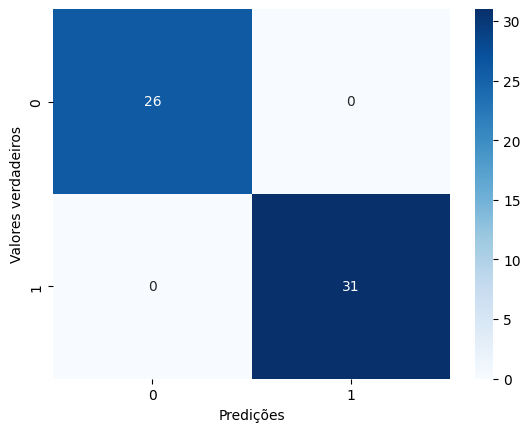

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões no conjunto de teste
predicoes = regressao_logistica.predict(teste)

# Gerar matriz de confusão
matriz_confusao = confusion_matrix(classe_teste, predicoes)

# Plotar matriz de confusão como um heatmap
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

# Adicionar rótulos aos eixos
plt.xlabel('Predições')
plt.ylabel('Valores verdadeiros')
plt.show()


### Prevendo se uma frase é cível ou criminal